In [41]:
!pip install chart_studio
import pandas as pd

In [42]:
filename= "dataset/input_data.xlsx"
df = pd.read_excel(filename, lines=True)

In [44]:
df.head(25)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [7]:
df.count()

Short description    8492
Description          8499
Caller               8500
Assignment group     8500
dtype: int64

In [8]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
          ... 
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_51       8
GRP_55       8
GRP_46       6
GRP_49       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_56       3
GRP_68       3
GRP_58       3
GRP_38       3
GRP_63       3
GRP_57       2
GRP_72       2
GRP_54       2
GRP_71       2
GRP_69       2
GRP_35       1
GRP_73       1
GRP_61       1
GRP_64       1
GRP_67       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

In [9]:

# Drop Rows if Description is null
df = df[~df['Description'].isnull()]

In [10]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['Description'] = preprocess(df['Description'])

In [11]:

# Adding Word count and Description Length
df['review_len'] = df['Description'].astype(str).apply(len)
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split()))

In [23]:
import chart_studio.plotly as py


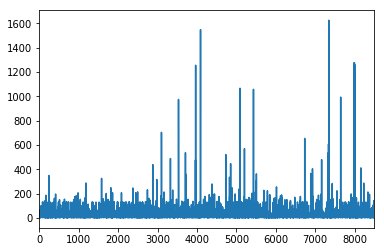

In [27]:
# Word Count Distribution for Description
df['word_count'].plot(
    x='word_count',
    y='count')

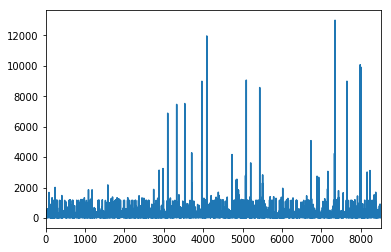

In [28]:
# Description Length Distribution
df['review_len'].plot(
    x='review length',
    y='count')

In [34]:
# The distribution of top unigrams before removing stop words for Description

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_words = get_top_n_words(df['Description'], 20)
for word, freq in common_words:
    print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
# df1.groupby('Description').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


to 6597
the 6343
com 3686
in 3421
from 3313
is 2697
company 2424
and 2394
received 2370
no 2238
gmail 2162
on 2032
not 1963
please 1952
for 1905
yes 1792
of 1609
na 1608
it 1585
at 1504


In [35]:
# The distribution of top unigrams after removing stop words for Description

def get_top_n_words(corpus, range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Description'], (1,1),20)
for word, freq in common_words:
    print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
# df1.groupby('Description').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


com 3686
company 2424
received 2370
gmail 2162
yes 1792
na 1608
2016 1382
00 1298
user 1215
erp 1189
password 1176
10 1099
job 1006
monitoring_tool 979
job_scheduler 969
access 959
failed 907
reset 839
ticket 832
issue 828


In [36]:
# The distribution of top bigrams after removing stop words for Description

common_words = get_top_n_words(df['Description'], (2,2),20)
for word, freq in common_words:
    print(word, freq)

gmail com 2162
yes na 1570
company com 1364
received monitoring_tool 961
monitoring_tool company 961
failed job_scheduler 809
com job 786
backup circuit 427
com hello 393
password reset 350
job_scheduler 09 312
cid image001 307
job_scheduler 10 288
na company 288
type outage 286
scheduled maintenance 286
power _________ 283
________ yes 267
erp sid_34 260
com mailto 260


In [37]:
# The distribution of top trigrams after removing stop words for Description

common_words = get_top_n_words(df['Description'], (3,3) ,20)
for word, freq in common_words:
    print(word, freq)

received monitoring_tool company 961
monitoring_tool company com 961
company com job 785
gmail com hello 371
failed job_scheduler 09 312
failed job_scheduler 10 288
yes na company 285
________ yes na 267
gmail com hi 209
gmail com mailto 208
cid image001 png 199
failed job_scheduler 08 187
asa 106023 deny 185
access group acl_inside 185
browser microsoft internet 168
microsoft internet explorer 168
internet explorer email 168
com customer number 167
language browser microsoft 165
gmail com customer 160
